In [2]:
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker 
from xgboost import XGBClassifier
from sklearn.inspection import partial_dependence

In [3]:
df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')

In [4]:
# define three-year mortalitty status
df_train.loc[:,'MORTSTAT3Y'] = np.where((df_train["MORTSTAT"] == 1) & (df_train["TIMETOEVENT"] <= 3), 1, 0)
df_test.loc[:,'MORTSTAT3Y'] = np.where((df_test["MORTSTAT"] == 1) & (df_test["TIMETOEVENT"] <= 3), 1, 0)

In [5]:
# select features and target
X_train = df_train.drop(columns=['MORTSTAT3Y', 'TIMETOEVENT', 'MORTSTAT'])
y_train = df_train['MORTSTAT3Y']

X_test = df_test.drop(columns=['MORTSTAT3Y', 'TIMETOEVENT', 'MORTSTAT'])
y_test_ = df_test['MORTSTAT3Y']

In [6]:
# XGBC

In [7]:
xgbc = XGBClassifier(objective='binary:logistic', random_state=42,
                     n_estimators=200, learning_rate=0.05, max_depth=3, subsample=0.5, colsample_bytree=0.8)
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

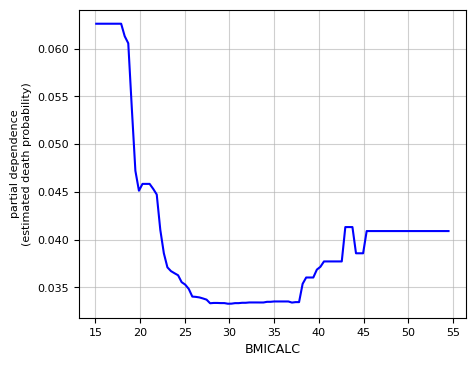

In [8]:
features = 'BMICALC'

# compute the PD
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.plot(x_values, average_values, color='blue')
plt.xlabel(features, fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylabel('partial dependence\n(estimated death probability)', fontsize=8)
plt.grid(alpha=0.6)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300, bbox_inches='tight')   
plt.show()

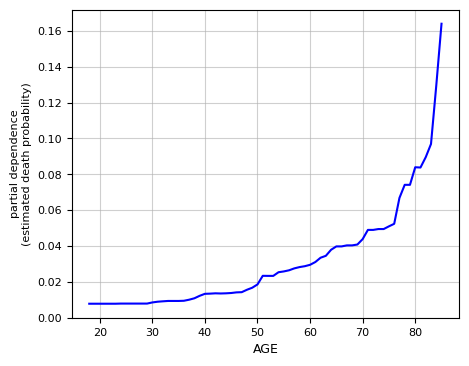

In [9]:
features = 'AGE'

# compute the PD
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.plot(x_values, average_values, color='blue')
plt.xlabel(features, fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylabel('partial dependence\n(estimated death probability)', fontsize=8)
plt.grid(alpha=0.6)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300, bbox_inches='tight') 
plt.show()

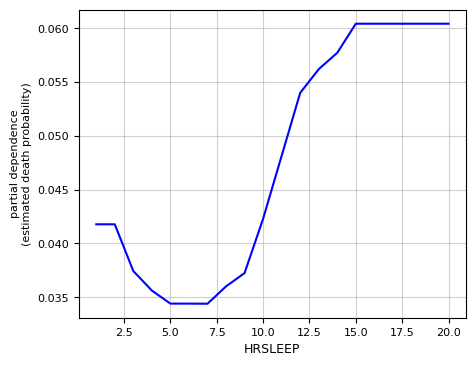

In [10]:
features = 'HRSLEEP'

# compute the PD
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.plot(x_values, average_values, color='blue')
plt.xlabel(features, fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylabel('partial dependence\n(estimated death probability)', fontsize=8)
plt.grid(alpha=0.6)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300, bbox_inches='tight')  
plt.show()

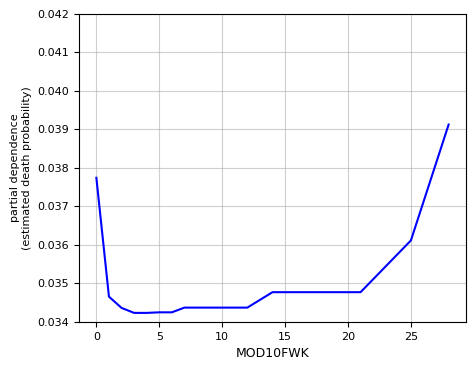

In [11]:
features = 'MOD10FWK'

# compute the PD
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.plot(x_values, average_values, color='blue')
plt.xlabel(features, fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylabel('partial dependence\n(estimated death probability)', fontsize=8)
plt.grid(alpha=0.6)
plt.ylim(0.034, 0.042)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300, bbox_inches='tight')
plt.show()

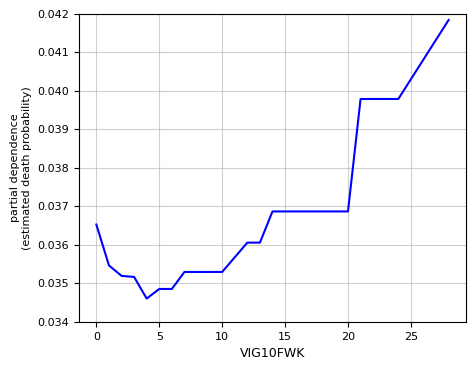

In [12]:
features = 'VIG10FWK'

# compute the PD
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.plot(x_values, average_values, color='blue')
plt.xlabel(features, fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylim(0.034, 0.042)
plt.ylabel('partial dependence\n(estimated death probability)', fontsize=8)
plt.grid(alpha=0.6)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300, bbox_inches='tight') 
plt.show()

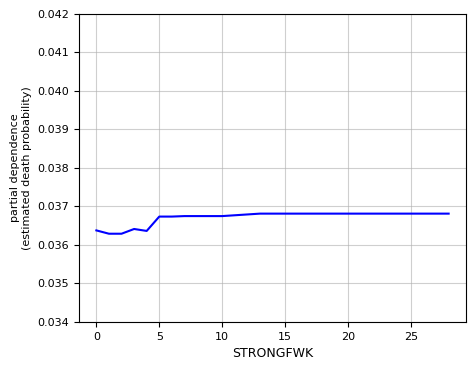

In [13]:
features = 'STRONGFWK'

# compute the PD
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.plot(x_values, average_values, color='blue')
plt.xlabel(features, fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylabel('partial dependence\n(estimated death probability)', fontsize=8)
plt.grid(alpha=0.6)
plt.ylim(0.034, 0.042)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300, bbox_inches='tight')
plt.show()

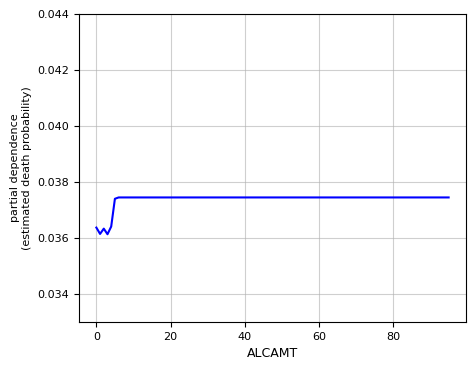

In [14]:
features = 'ALCAMT'

# compute the PD
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.plot(x_values, average_values, color='blue')
plt.xlabel(features, fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylim(0.033, 0.044)
plt.ylabel('partial dependence\n(estimated death probability)', fontsize=8)
plt.grid(alpha=0.6)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300, bbox_inches='tight') 
plt.show()

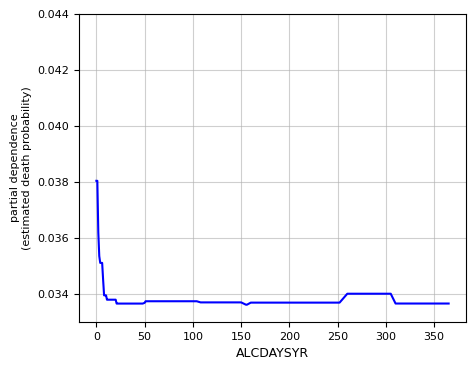

In [15]:
features = 'ALCDAYSYR'

# compute the PD
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.plot(x_values, average_values, color='blue')
plt.xlabel(features, fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylim(0.033, 0.044)
plt.ylabel('partial dependence\n(estimated death probability)', fontsize=8)
plt.grid(alpha=0.6)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300, bbox_inches='tight') 
plt.show()

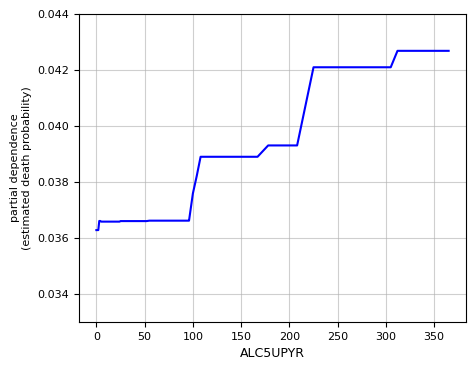

In [16]:
features = 'ALC5UPYR'

# compute the PD
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.plot(x_values, average_values, color='blue')
plt.xlabel(features, fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylim(0.033, 0.044)
plt.ylabel('partial dependence\n(estimated death probability)', fontsize=8)
plt.grid(alpha=0.6)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300, bbox_inches='tight') 
plt.show()

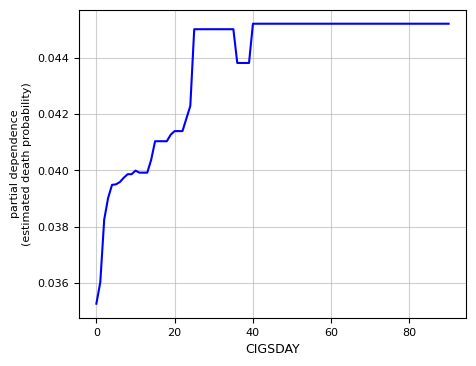

In [17]:
features = 'CIGSDAY'

# compute the PD
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.plot(x_values, average_values, color='blue')
plt.xlabel(features, fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylabel('partial dependence\n(estimated death probability)', fontsize=8)
plt.grid(alpha=0.6)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300, bbox_inches='tight') 
plt.show()

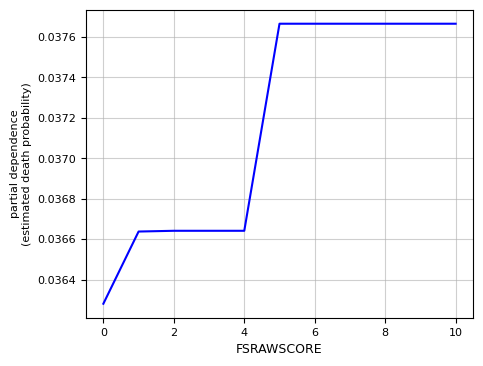

In [18]:
features = 'FSRAWSCORE'

# compute the PD
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.plot(x_values, average_values, color='blue')
plt.xlabel(features, fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylabel('partial dependence\n(estimated death probability)', fontsize=8)
plt.grid(alpha=0.6)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300, bbox_inches='tight') 
plt.show()

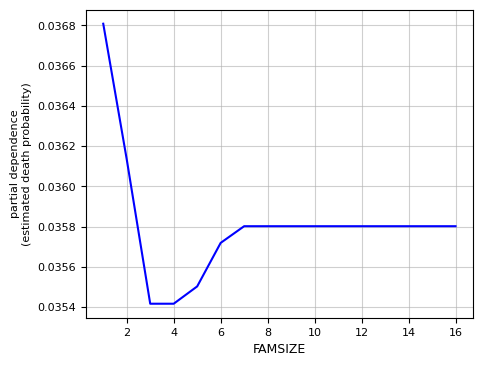

In [19]:
features = 'FAMSIZE'

# compute the PD
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.plot(x_values, average_values, color='blue')
plt.xlabel(features, fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylabel('partial dependence\n(estimated death probability)', fontsize=8)
plt.grid(alpha=0.6)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300, bbox_inches='tight') 
plt.show()

In [20]:
# line 1

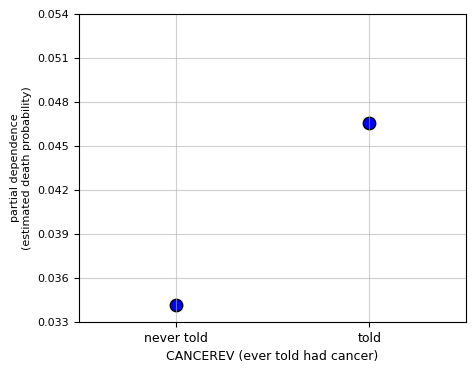

In [21]:
features = 'CANCEREV'
custom_labels = {1: "never told", 2: "told"} 

pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)  
plt.xlabel('CANCEREV (ever told had cancer)', fontsize=9)
plt.xticks(ticks=list(custom_labels.keys()), labels=list(custom_labels.values()), fontsize=9)
plt.yticks(fontsize=8)
plt.xlim(0.5, 2.5) 
plt.ylabel('partial dependence\n(estimated death probability)', fontsize=8)
plt.grid(alpha=0.6)
y_ticks = np.arange(0.033, 0.056, 0.003)
plt.yticks(y_ticks, fontsize=8) 
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300, bbox_inches='tight') 
plt.show()

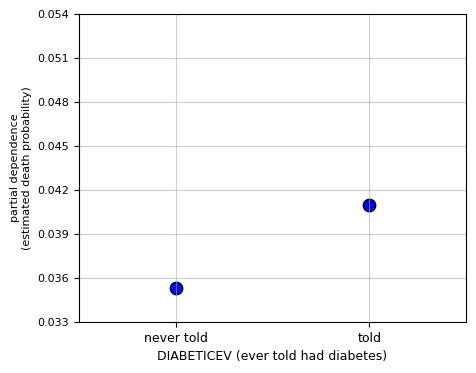

In [22]:
features = 'DIABETICEV'
custom_labels = {1: "never told", 2: "told"} 

pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)  
plt.xlabel('DIABETICEV (ever told had diabetes)', fontsize=9)
plt.xticks(ticks=list(custom_labels.keys()), labels=list(custom_labels.values()), fontsize=9)
plt.yticks(fontsize=8)
plt.xlim(0.5, 2.5) 
plt.ylabel('', fontsize=8)
plt.grid(alpha=0.6)
y_ticks = np.arange(0.033, 0.056, 0.003)
plt.yticks(y_ticks, fontsize=8) 
plt.ylabel('partial dependence\n(estimated death probability)', fontsize=8)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300, bbox_inches='tight') 
plt.show()

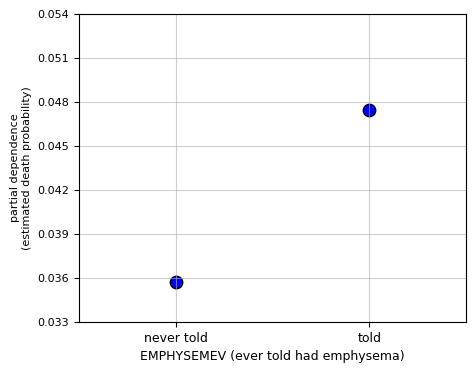

In [23]:
features = 'EMPHYSEMEV'
custom_labels = {1: "never told", 2: "told"} 

pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)  
plt.xlabel('EMPHYSEMEV (ever told had emphysema)', fontsize=9)
plt.xticks(ticks=list(custom_labels.keys()), labels=list(custom_labels.values()), fontsize=9)
plt.yticks(fontsize=8)
plt.xlim(0.5, 2.5) 
plt.ylabel('', fontsize=8)
plt.grid(alpha=0.6)
y_ticks = np.arange(0.033, 0.056, 0.003)
plt.yticks(y_ticks, fontsize=8) 

plt.ylabel('partial dependence\n(estimated death probability)', fontsize=8)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300, bbox_inches='tight') 
plt.show()

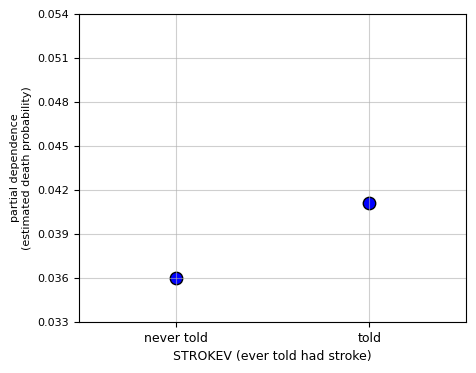

In [24]:
features = 'STROKEV'
custom_labels = {1: "never told", 2: "told"} 

pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)  
plt.xlabel('STROKEV (ever told had stroke)', fontsize=9)
plt.xticks(ticks=list(custom_labels.keys()), labels=list(custom_labels.values()), fontsize=9)
plt.yticks(fontsize=8)
plt.xlim(0.5, 2.5) 
plt.ylabel('', fontsize=8)
plt.grid(alpha=0.6)
y_ticks = np.arange(0.033, 0.056, 0.003)
plt.yticks(y_ticks, fontsize=8) 

plt.ylabel('partial dependence\n(estimated death probability)', fontsize=8)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300, bbox_inches='tight') 
plt.show()

In [25]:
# line 2

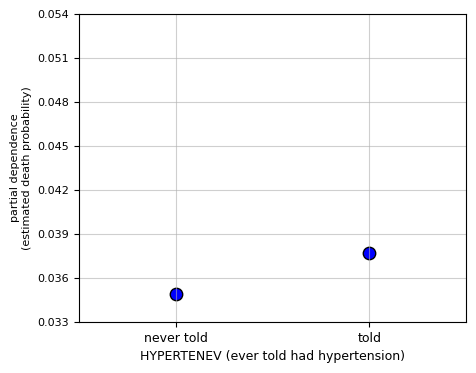

In [26]:
features = 'HYPERTENEV'
custom_labels = {1: "never told", 2: "told"} 

pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)  
plt.xlabel('HYPERTENEV (ever told had hypertension)', fontsize=9)
plt.xticks(ticks=list(custom_labels.keys()), labels=list(custom_labels.values()), fontsize=9)
plt.yticks(fontsize=8)
plt.xlim(0.5, 2.5) 
plt.ylabel('', fontsize=8)
plt.grid(alpha=0.6)
y_ticks = np.arange(0.033, 0.056, 0.003)
plt.yticks(y_ticks, fontsize=8) 

plt.ylabel('partial dependence\n(estimated death probability)', fontsize=8)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300, bbox_inches='tight') 
plt.show()

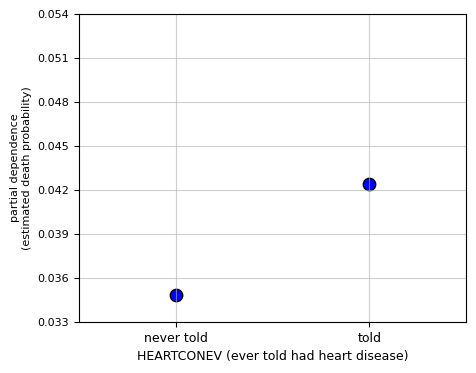

In [27]:
features = 'HEARTCONEV'
custom_labels = {1: "never told", 2: "told"} 

pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)  
plt.xlabel('HEARTCONEV (ever told had heart disease)', fontsize=9)
plt.xticks(ticks=list(custom_labels.keys()), labels=list(custom_labels.values()), fontsize=9)
plt.yticks(fontsize=8)
plt.xlim(0.5, 2.5) 
plt.ylabel('', fontsize=8)
plt.grid(alpha=0.6)
y_ticks = np.arange(0.033, 0.056, 0.003)
plt.yticks(y_ticks, fontsize=8) 

plt.ylabel('partial dependence\n(estimated death probability)', fontsize=8)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300, bbox_inches='tight') 
plt.show()

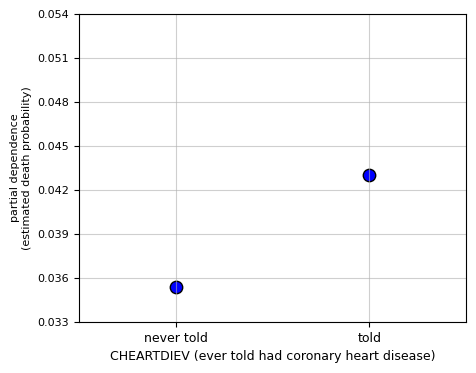

In [28]:
features = 'CHEARTDIEV'
custom_labels = {1: "never told", 2: "told"} 

pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)  
plt.xlabel('CHEARTDIEV (ever told had coronary heart disease)', fontsize=9)
plt.xticks(ticks=list(custom_labels.keys()), labels=list(custom_labels.values()), fontsize=9)
plt.yticks(fontsize=8)
plt.xlim(0.5, 2.5) 
plt.ylabel('', fontsize=8)
plt.grid(alpha=0.6)
y_ticks = np.arange(0.033, 0.056, 0.003)
plt.yticks(y_ticks, fontsize=8) 

plt.ylabel('partial dependence\n(estimated death probability)', fontsize=8)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300, bbox_inches='tight') 
plt.show()

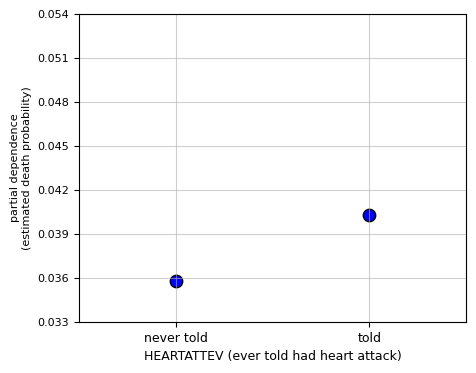

In [29]:
features = 'HEARTATTEV'
custom_labels = {1: "never told", 2: "told"} 

pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)  
plt.xlabel('HEARTATTEV (ever told had heart attack)', fontsize=9)
plt.xticks(ticks=list(custom_labels.keys()), labels=list(custom_labels.values()), fontsize=9)
plt.yticks(fontsize=8)
plt.xlim(0.5, 2.5) 
plt.ylabel('', fontsize=8)
plt.grid(alpha=0.6)
y_ticks = np.arange(0.033, 0.056, 0.003)
plt.yticks(y_ticks, fontsize=8) 

plt.ylabel('partial dependence\n(estimated death probability)', fontsize=8)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300, bbox_inches='tight') 
plt.show()

In [30]:
# line 3

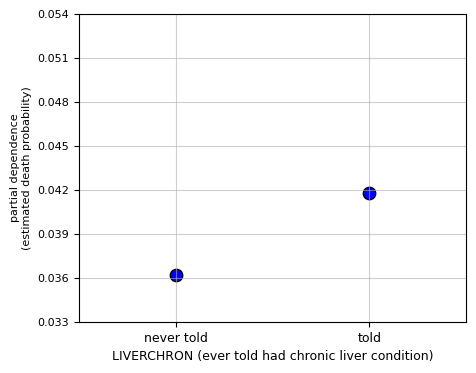

In [31]:
features = 'LIVERCHRON'
custom_labels = {1: "never told", 2: "told"} 

pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)  
plt.xlabel('LIVERCHRON (ever told had chronic liver condition)', fontsize=9)
plt.xticks(ticks=list(custom_labels.keys()), labels=list(custom_labels.values()), fontsize=9)
plt.yticks(fontsize=8)
plt.xlim(0.5, 2.5) 
plt.ylabel('', fontsize=8)
plt.grid(alpha=0.6)
y_ticks = np.arange(0.033, 0.056, 0.003)
plt.yticks(y_ticks, fontsize=8) 

plt.ylabel('partial dependence\n(estimated death probability)', fontsize=8)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300, bbox_inches='tight') 
plt.show()

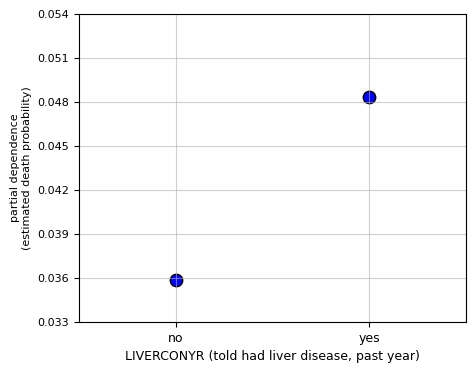

In [32]:
features = 'LIVERCONYR'
custom_labels = {1: "no", 2: "yes"} 

pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)  
plt.xlabel('LIVERCONYR (told had liver disease, past year)', fontsize=9)
plt.xticks(ticks=list(custom_labels.keys()), labels=list(custom_labels.values()), fontsize=9)
plt.yticks(fontsize=8)
plt.xlim(0.5, 2.5) 
plt.ylabel('', fontsize=8)
plt.grid(alpha=0.6)
y_ticks = np.arange(0.033, 0.056, 0.003)
plt.yticks(y_ticks, fontsize=8) 

plt.ylabel('partial dependence\n(estimated death probability)', fontsize=8)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300, bbox_inches='tight') 
plt.show()

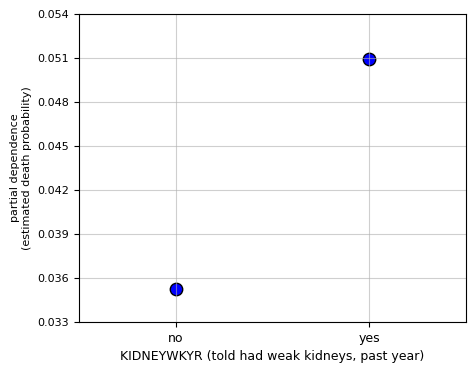

In [33]:
features = 'KIDNEYWKYR'
custom_labels = {1: "no", 2: "yes"} 

pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)  
plt.xlabel('KIDNEYWKYR (told had weak kidneys, past year)', fontsize=9)
plt.xticks(ticks=list(custom_labels.keys()), labels=list(custom_labels.values()), fontsize=9)
plt.yticks(fontsize=8)
plt.xlim(0.5, 2.5) 
plt.ylabel('', fontsize=8)
plt.grid(alpha=0.6)
y_ticks = np.arange(0.033, 0.056, 0.003)
plt.yticks(y_ticks, fontsize=8) 

plt.ylabel('partial dependence\n(estimated death probability)', fontsize=8)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300, bbox_inches='tight') 
plt.show()

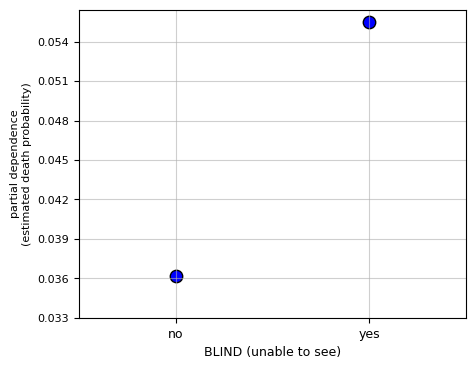

In [34]:
features = 'BLIND'
custom_labels = {1: "no", 2: "yes"} 

pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)  
plt.xlabel('BLIND (unable to see)', fontsize=9)
plt.xticks(ticks=list(custom_labels.keys()), labels=list(custom_labels.values()), fontsize=9)
plt.yticks(fontsize=8)
plt.xlim(0.5, 2.5) 
plt.ylabel('', fontsize=8)
plt.grid(alpha=0.6)
y_ticks = np.arange(0.033, 0.056, 0.003)
plt.yticks(y_ticks, fontsize=8) 

plt.ylabel('partial dependence\n(estimated death probability)', fontsize=8)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300, bbox_inches='tight') 
plt.show()

In [35]:
# insurance

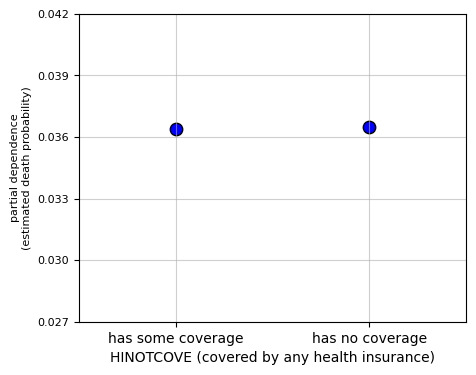

In [36]:
features = 'HINOTCOVE'
custom_labels = {1: "has some coverage", 2: "has no coverage"} 

pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)  
plt.xlabel('HINOTCOVE (covered by any health insurance)', fontsize=10)
plt.xticks(ticks=list(custom_labels.keys()), labels=list(custom_labels.values()), fontsize=10)
plt.yticks(fontsize=8)
plt.xlim(0.5, 2.5) 
plt.ylabel('', fontsize=9)
plt.grid(alpha=0.6)
y_ticks = np.arange(0.027, 0.043, 0.003)
plt.yticks(y_ticks, fontsize=8) 

plt.ylabel('partial dependence\n(estimated death probability)', fontsize=8)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300, bbox_inches='tight') 
plt.show()

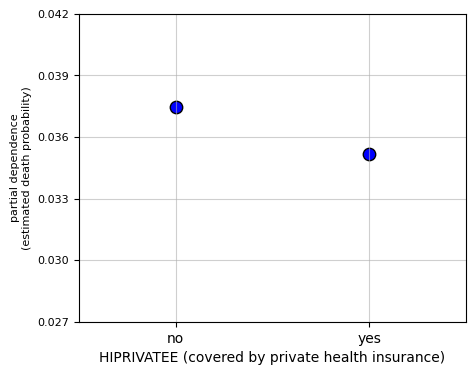

In [37]:
features = 'HIPRIVATEE'
custom_labels = {1: "no", 2: "yes"}  

pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)  
plt.xlabel('HIPRIVATEE (covered by private health insurance)', fontsize=10)
plt.xticks(ticks=list(custom_labels.keys()), labels=list(custom_labels.values()), fontsize=10)
plt.yticks(fontsize=8)
plt.xlim(0.5, 2.5) 
plt.ylabel('', fontsize=8)
plt.grid(alpha=0.6)
y_ticks = np.arange(0.027, 0.043, 0.003)
plt.yticks(y_ticks, fontsize=8) 

plt.ylabel('partial dependence\n(estimated death probability)', fontsize=8)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300, bbox_inches='tight') 
plt.show()

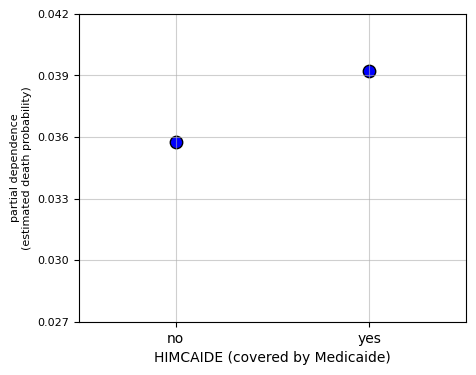

In [38]:
features = 'HIMCAIDE'
custom_labels = {1: "no", 2: "yes"} 

pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)  
plt.xlabel('HIMCAIDE (covered by Medicaide)', fontsize=10)
plt.xticks(ticks=list(custom_labels.keys()), labels=list(custom_labels.values()), fontsize=10)
plt.yticks(fontsize=8)
plt.xlim(0.5, 2.5) 
plt.ylabel('', fontsize=8)
plt.grid(alpha=0.6)
y_ticks = np.arange(0.027, 0.043, 0.003)
plt.yticks(y_ticks, fontsize=8) 

plt.ylabel('partial dependence\n(estimated death probability)', fontsize=8)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300, bbox_inches='tight') 
plt.show()

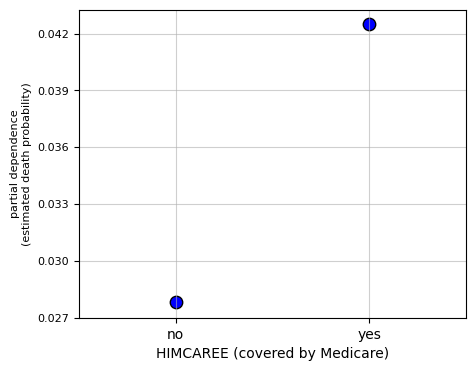

In [39]:
features = 'HIMCAREE'
custom_labels = {1: "no", 2: "yes"} 

pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)  
plt.xlabel('HIMCAREE (covered by Medicare)', fontsize=10)
plt.xticks(ticks=list(custom_labels.keys()), labels=list(custom_labels.values()), fontsize=10)
plt.yticks(fontsize=8)
plt.xlim(0.5, 2.5) 
plt.ylabel('', fontsize=9)
plt.grid(alpha=0.6)
y_ticks = np.arange(0.027, 0.043, 0.003)
plt.yticks(y_ticks, fontsize=8) 

plt.ylabel('partial dependence\n(estimated death probability)', fontsize=8)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300, bbox_inches='tight') 
plt.show()

In [40]:
# new line

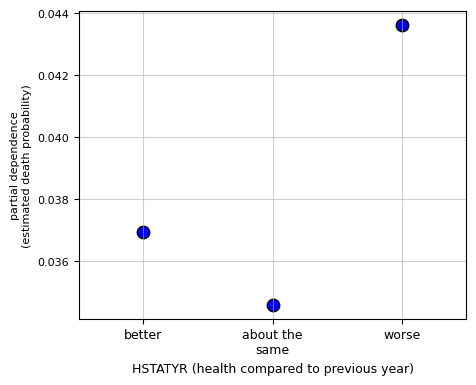

In [41]:
features = 'HSTATYR'
custom_labels = {1: "better", 2: "about the\nsame", 3: "worse"} 

pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)  
plt.xlabel('HSTATYR (health compared to previous year)', fontsize=9)
plt.xticks(ticks=list(custom_labels.keys()), labels=list(custom_labels.values()), fontsize=9)
plt.yticks(fontsize=8)
plt.xlim(0.5, 3.5) 
plt.ylabel('', fontsize=8)
plt.grid(alpha=0.6)

plt.ylabel('partial dependence\n(estimated death probability)', fontsize=8)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300, bbox_inches='tight') 
plt.show()

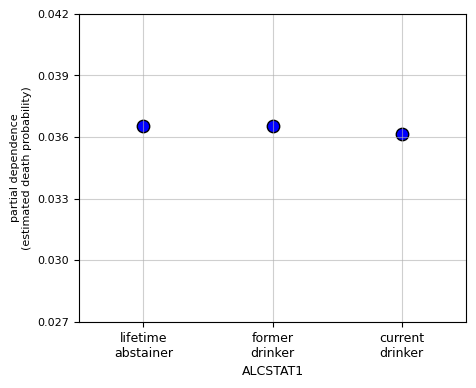

In [42]:
features = 'ALCSTAT1'
custom_labels = {1: "lifetime\nabstainer", 2: "former\ndrinker", 3: "current\ndrinker"} 

pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)  
plt.xlabel('ALCSTAT1', fontsize=9)
plt.xticks(ticks=list(custom_labels.keys()), labels=list(custom_labels.values()), fontsize=9)
plt.yticks(fontsize=8)
plt.xlim(0.5, 3.5) 
plt.ylabel('', fontsize=8)
plt.grid(alpha=0.6)
plt.yticks(y_ticks, fontsize=8) 

plt.ylabel('partial dependence\n(estimated death probability)', fontsize=8)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300, bbox_inches='tight') 
plt.show()

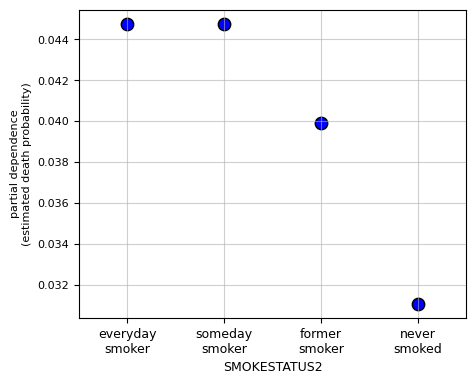

In [43]:
features = 'SMOKESTATUS2'
original_categories = [11, 12, 20, 30]  
mapped_positions = np.linspace(1, len(original_categories), len(original_categories))
custom_labels = ["everyday\nsmoker", "someday\nsmoker", "former\nsmoker", "never\nsmoked"] 

pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]
mapped_x_values = [mapped_positions[original_categories.index(x)] for x in x_values]

plt.figure(figsize=(5, 4))
plt.scatter(mapped_x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)
plt.xlabel('SMOKESTATUS2', fontsize=9)
plt.yticks(fontsize=8)
plt.xticks(ticks=mapped_positions, labels=custom_labels, fontsize=9)
plt.xlim(min(mapped_positions) - 0.5, max(mapped_positions) + 0.5)
plt.grid(axis='both', alpha=0.6)
plt.ylabel('partial dependence\n(estimated death probability)', fontsize=8)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300, bbox_inches='tight')
plt.show()

In [44]:
# new line

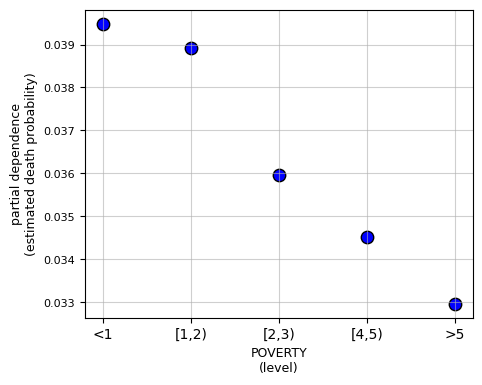

In [45]:
features = 'POVERTY'

custom_labels = {1: "<1", 2: "[1,2)", 3: "[2,3)", 4: "[4,5)", 5: ">5"} 

# compute the PD
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)  
plt.xlabel('POVERTY\n(level)', fontsize=9)
plt.xticks(ticks=list(custom_labels.keys()), labels=list(custom_labels.values()), fontsize=10)
plt.yticks(fontsize=8)
plt.xlim(0.8, 5.2)
plt.grid(alpha=0.6)

plt.ylabel('partial dependence\n(estimated death probability)', fontsize=9)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300, bbox_inches='tight') 
plt.show()

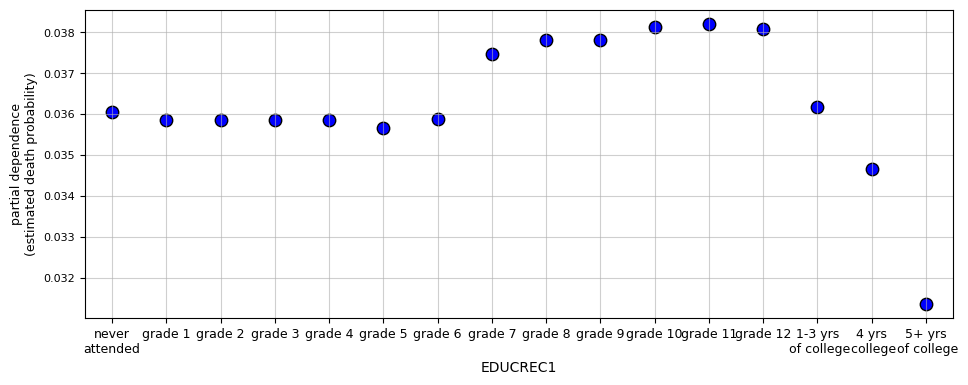

In [46]:
features = 'EDUCREC1'

custom_labels = {
    1: 'never\nattended',
    2: 'grade 1',
    3: 'grade 2',
    4: 'grade 3',
    5: 'grade 4',
    6: 'grade 5',
    7: 'grade 6',
    8: 'grade 7',
    9: 'grade 8',
    10: 'grade 9',
    11: 'grade 10',
    12: 'grade 11',
    13: 'grade 12',
    14: '1-3 yrs\n of college',
    15: '4 yrs\n college',
    16: '5+ yrs\n of college'
}

# compute the PD
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(11.2, 4))
plt.scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)  
plt.xlabel(features, fontsize=10)
plt.xticks(ticks=list(custom_labels.keys()), labels=list(custom_labels.values()), fontsize=9)
plt.yticks(fontsize=8)
plt.xlim(0.5, 16.5)
plt.ylabel('partial dependence\n(estimated death probability)', fontsize=9)
plt.grid(alpha=0.6)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300, bbox_inches='tight') 
plt.show()

In [47]:
# new line

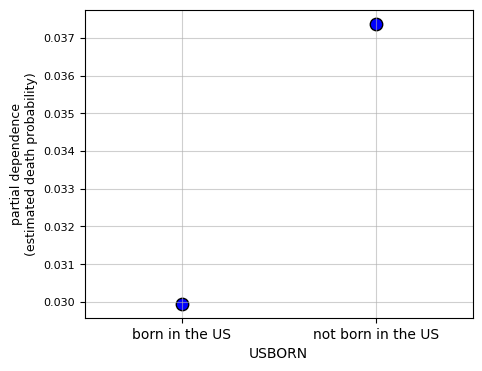

In [48]:
features = 'USBORN'

custom_labels = {10: "born in the US", 20: "not born in the US"}  

# compute the PD
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)  
plt.xlabel(features, fontsize=10)
plt.xticks(ticks=list(custom_labels.keys()), labels=list(custom_labels.values()), fontsize=10)
plt.yticks(fontsize=8)
plt.grid(alpha=0.6)
plt.xlim(5, 25)
plt.ylabel('partial dependence\n(estimated death probability)', fontsize=9)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300, bbox_inches='tight')  
plt.show()

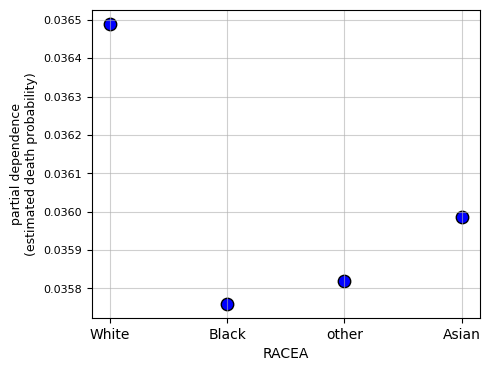

In [49]:
features = 'RACEA'

custom_labels = {1: "White", 2: "Black", 3: "other", 4: "Asian"}  

# compute the PD
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)  
plt.xlabel(features, fontsize=10)
plt.xticks(ticks=list(custom_labels.keys()), labels=list(custom_labels.values()), fontsize=10)
plt.yticks(fontsize=8)
plt.grid(alpha=0.6)

plt.ylabel('partial dependence\n(estimated death probability)', fontsize=9)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300, bbox_inches='tight') 
plt.show()

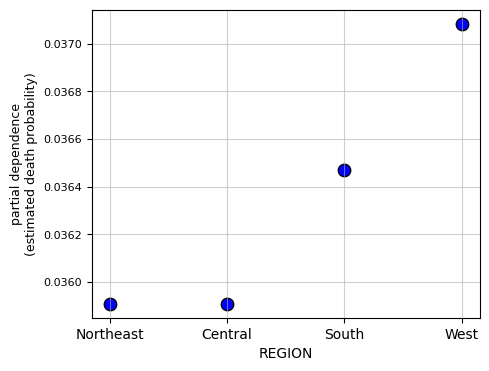

In [50]:
features = 'REGION'

custom_labels = {1: "Northeast", 2: "Central", 3: "South", 4: "West"}  

# compute the PD
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)  
plt.xlabel(features, fontsize=10)
plt.xticks(ticks=list(custom_labels.keys()), labels=list(custom_labels.values()), fontsize=10)
plt.yticks(fontsize=8)
plt.grid(alpha=0.6)

plt.ylabel('partial dependence\n(estimated death probability)', fontsize=9)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300, bbox_inches='tight') 
plt.show()

In [51]:
# new line

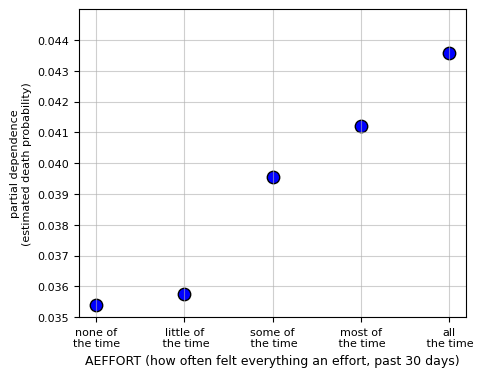

In [52]:
features = 'AEFFORT'
custom_labels = {0: "none of\nthe time", 1: "little of\n the time", 2: 'some of\n the time', 3: 'most of\n the time', 4: 'all\n the time'} 

# compute the PD
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)  
plt.xlabel('AEFFORT (how often felt everything an effort, past 30 days)', fontsize=9)
plt.xticks(ticks=list(custom_labels.keys()), labels=list(custom_labels.values()), fontsize=8)
plt.yticks(fontsize=8)
plt.grid(alpha=0.6)
y_ticks = np.arange(0.0350, 0.0450, 0.001)
plt.ylim(0.0350, 0.0450) 
plt.yticks(y_ticks, fontsize=8) 

plt.ylabel('partial dependence\n(estimated death probability)', fontsize=8)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300, bbox_inches='tight') 
plt.show()

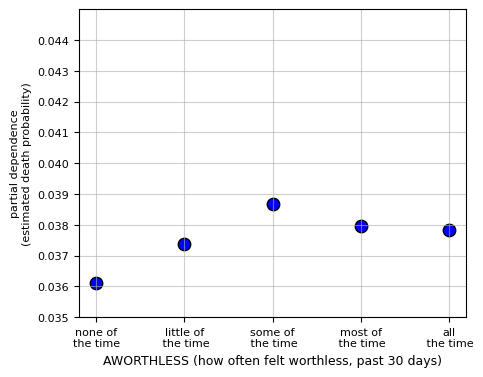

In [53]:
features = 'AWORTHLESS'
custom_labels = {0: "none of\nthe time", 1: "little of\n the time", 2: 'some of\n the time', 3: 'most of\n the time', 4: 'all\n the time'} 

# compute the PD
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)  
plt.xlabel('AWORTHLESS (how often felt worthless, past 30 days)', fontsize=9)
plt.xticks(ticks=list(custom_labels.keys()), labels=list(custom_labels.values()), fontsize=8)
plt.yticks(fontsize=8)
plt.grid(alpha=0.6)

y_ticks = np.arange(0.0350, 0.0450, 0.001)
plt.ylim(0.0350, 0.0450) 
plt.yticks(y_ticks, fontsize=8) 

plt.ylabel('partial dependence\n(estimated death probability)', fontsize=8)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300, bbox_inches='tight') 
plt.show()

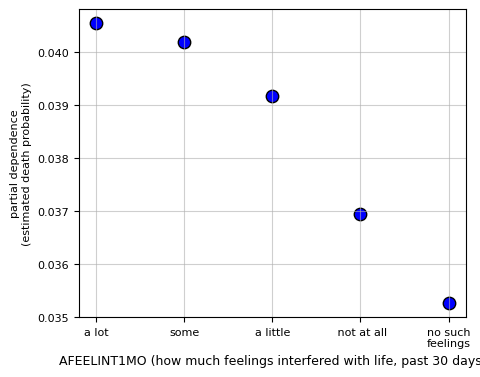

In [54]:
features = 'AFEELINT1MO'
custom_labels = {1: "a lot", 2: "some", 3: "a little", 4: " not at all", 5: "no such\nfeelings"} 

# compute the PD
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)  
plt.xlabel('AFEELINT1MO (how much feelings interfered with life, past 30 days)', fontsize=9)
plt.xticks(ticks=list(custom_labels.keys()), labels=list(custom_labels.values()), fontsize=8)
plt.yticks(fontsize=8)
plt.grid(alpha=0.6)

plt.ylabel('partial dependence\n(estimated death probability)', fontsize=8)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300, bbox_inches='tight') 
plt.show()

In [55]:
# next line

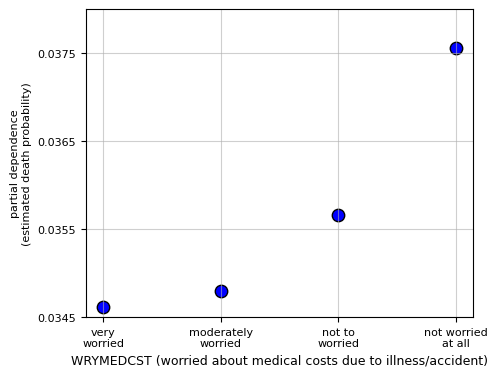

In [56]:
features = 'WRYMEDCST'
custom_labels = {1: "very\nworried", 2: "moderately\nworried", 3: 'not to\nworried', 4: 'not worried\nat all'} 

# compute the PD
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)  
plt.xlabel('WRYMEDCST (worried about medical costs due to illness/accident)', fontsize=9)
plt.xticks(ticks=list(custom_labels.keys()), labels=list(custom_labels.values()), fontsize=8)
plt.yticks(fontsize=8)
plt.grid(alpha=0.6)
y_ticks = np.arange(0.0345, 0.0380, 0.001)
plt.ylim(0.0345, 0.0380) 
plt.yticks(y_ticks, fontsize=8) 

plt.ylabel('partial dependence\n(estimated death probability)', fontsize=8)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300, bbox_inches='tight') 
plt.show()

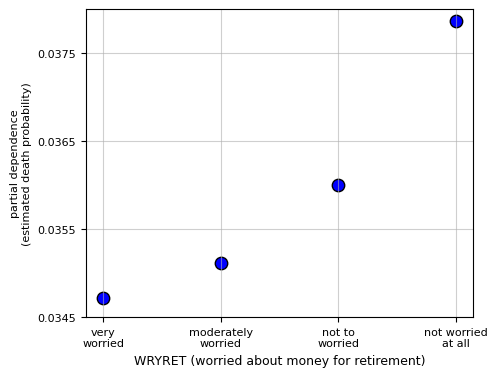

In [57]:
features = 'WRYRET'
custom_labels = {1: "very\nworried", 2: "moderately\nworried", 3: 'not to\nworried', 4: 'not worried\nat all'} 

# compute the PD
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)  
plt.xlabel('WRYRET (worried about money for retirement)', fontsize=9)
plt.xticks(ticks=list(custom_labels.keys()), labels=list(custom_labels.values()), fontsize=8)
plt.yticks(fontsize=8)
plt.grid(alpha=0.6)
y_ticks = np.arange(0.0345, 0.0380, 0.001)
plt.ylim(0.0345, 0.0380) 
plt.yticks(y_ticks, fontsize=8) 


plt.ylabel('partial dependence\n(estimated death probability)', fontsize=8)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300, bbox_inches='tight') 
plt.show()

In [58]:
# new line

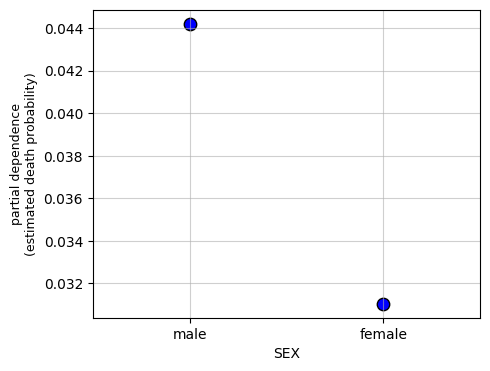

In [59]:
features = 'SEX'

custom_labels = {1: "male", 2: "female"}  

# compute the PD
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)  
plt.xlabel(features, fontsize=10)
plt.xticks(ticks=list(custom_labels.keys()), labels=list(custom_labels.values()), fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(0.5, 2.5)
plt.ylabel('partial dependence\n(estimated death probability)', fontsize=9)
plt.grid(alpha=0.6)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300, bbox_inches='tight') 
plt.show()

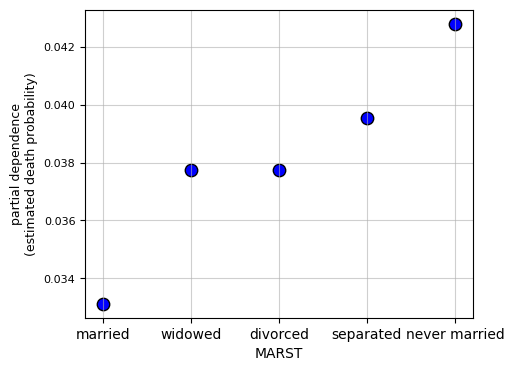

In [60]:
features = 'MARST'

custom_labels = {10: "married", 20: "widowed", 30: "divorced", 40: "separated", 50: "never married"}  

# compute the PD
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)  
plt.xlabel(features, fontsize=10)
plt.xticks(ticks=list(custom_labels.keys()), labels=list(custom_labels.values()), fontsize=10)
plt.yticks(fontsize=8)
plt.xlim(8, 52)
plt.ylabel('partial dependence\n(estimated death probability)', fontsize=9)
plt.grid(alpha=0.6)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300, bbox_inches='tight')   
plt.show()